In [6]:
#Importacion de librerias
import re
import csv

In [9]:
with open ('pubmed_heliconius_set.txt',encoding='utf-8') as f:
    datos= f.read()
    

In [11]:
datos = re.sub(r'\n\s{6}', ' ', datos)
dat= re.findall (r"\,\s[A-zA-Z]{2,13}\.\s", datos)
print(dat)

[', Inc.\n', ', Brazil.\n', ', Brazil.\n', ', Brazil.\n', ', Brazil.\n', ', Brazil.\n', ', Brazil.\n', ', Av. ', ', Brazil.\n', ', respectively. ', ', Brazil.\n', ', Brazil.\n', ', Brazil.\n', ', Brazil.\n', ', Brazil.\n', ', Brazil.\n', ', Brazil.\n', ', France.\n', ', Germany.\n', ', Germany.\n', ', Germany.\n', ', Germany.\n', ', Germany.\n', ', USA.\n', ', Germany.\n', ', UK.\n', ', UK.\n', ', Colombia.\n', ', UK.\n', ', UK.\n', ', Ecuador.\n', ', Ecuador.\n', ', Ecuador.\n', ', UK.\n', ', France.\n', ', UK.\n', ', UK.\n', ', USA. ', ', USA.\n', ', USA.\n', ', USA.\n', ', USA.\n', ', USA.\n', ', USA.\n', ', USA.\n', ', USA.\n', ', UK.\n', ', USA.\n', ', UK.\n', ', Ecuador.\n', ', Panama.\n', ', PR.\n', ', USA.\n', ', Panama.\n', ', USA.\n', ', USA.\n', ', UK.\n', ', Av. ', ', Colombia.\n', ', USA.\n', ', USA.\n', ', Univ. ', ', Brazil.\n', ', Univ. ', ', Univ. ', ', Brazil. ', ', respectively. ', ', USA.\n', ', USA.\n', ', USA.\n', ', USA. ', ', USA.\n', ', NY.\n', ', NY.\n', ', US

In [58]:
#print(datos[:2000])


In [59]:
zipcodes = re.findall(r'[Aa]\s(\d{6})', datos)


In [61]:
len(zipcodes)
unique_zipcodes = list(set(zipcodes))
len(unique_zipcodes)


0

In [62]:
zip_coordinates = {}
with open('coordinates.txt') as f:
    csvr = csv.DictReader(f)
    for row in csvr:
        zip_coordinates[row['ZIP']] = [float(row['LAT']), 
                                       float(row['LNG'])]

In [63]:
zip_code = []
zip_long = []
zip_lat = []
zip_count = []

In [64]:
for z in unique_zipcodes:
    # if we can find the coordinates
    if z in zip_coordinates.keys():
        zip_code.append(z)
        zip_lat.append(zip_coordinates[z][0])
        zip_long.append(zip_coordinates[z][1])
        zip_count.append(zipcodes.count(z))

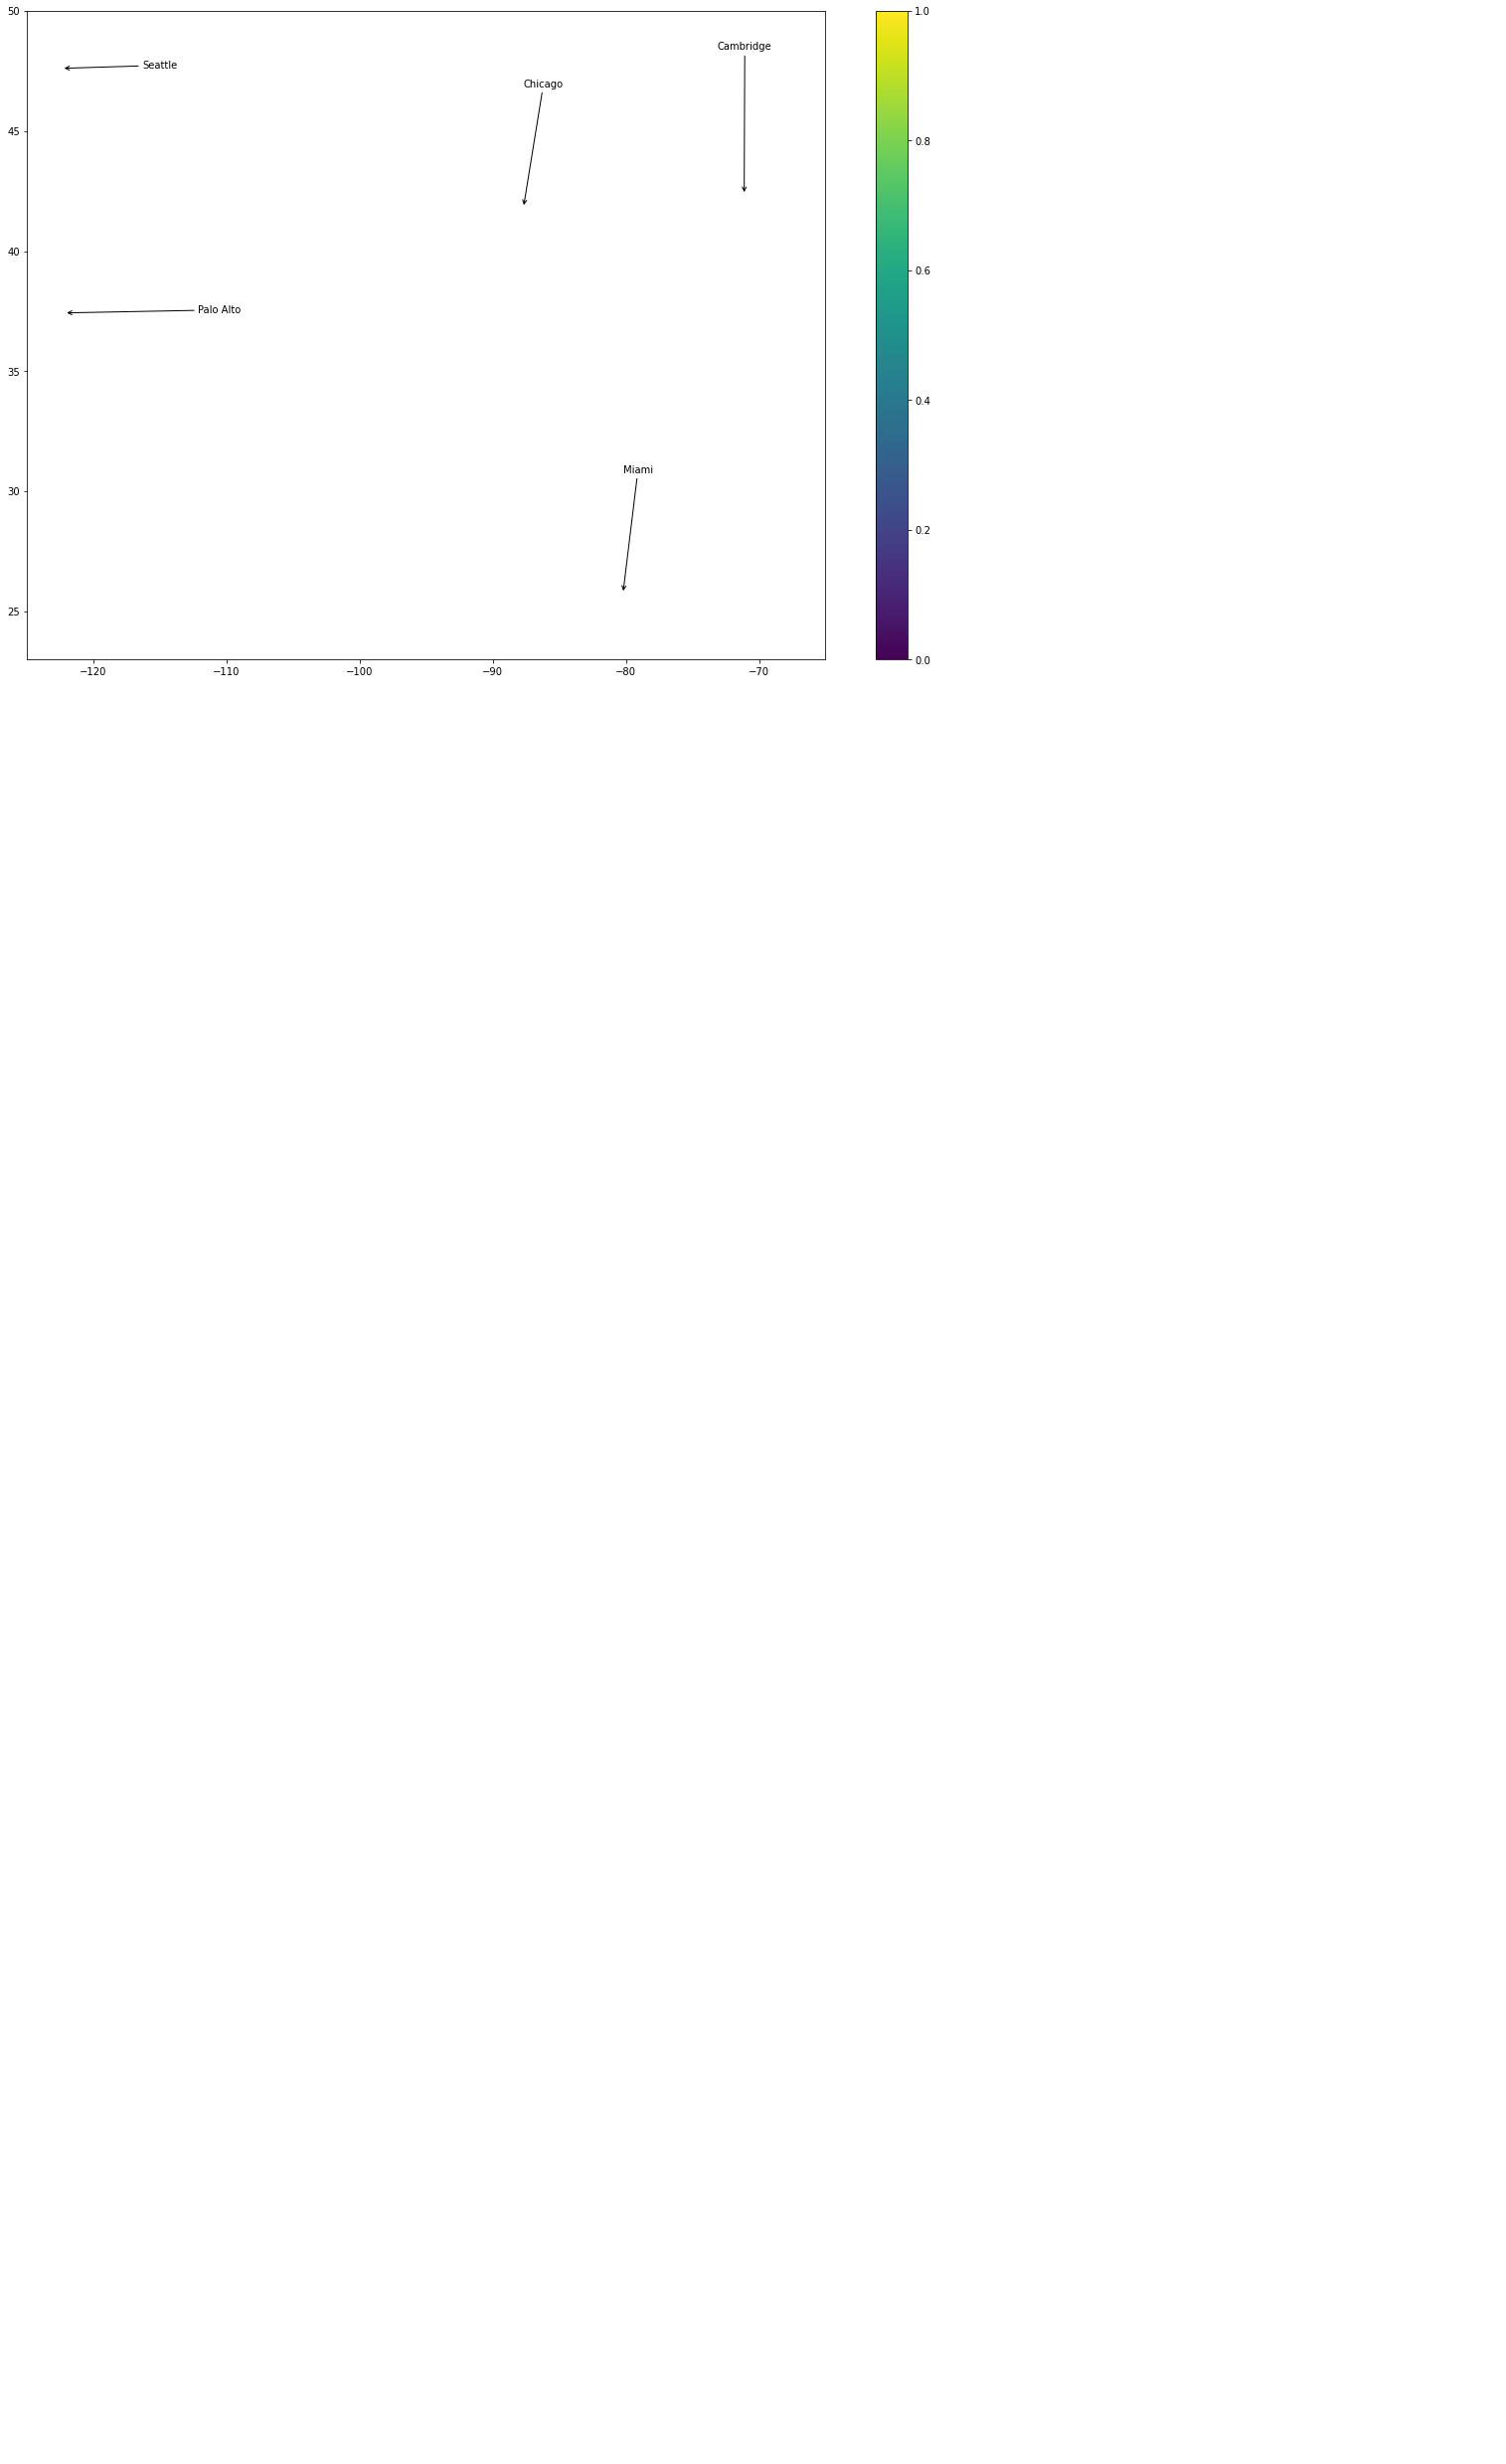

In [66]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(zip_long, zip_lat, s = zip_count, c= zip_count)
plt.colorbar()
# only continental us without Alaska
plt.xlim(-125,-65)
plt.ylim(23, 50)
# add a few cities for reference (optional)
ard = dict(arrowstyle="->")
plt.annotate('Brazil', xy = (-14.235004, -51.92528), 
               xytext = (-108.25, 34.05), arrowprops = ard)
plt.annotate('Palo Alto', xy = (-122.1381, 37.4292), 
               xytext = (-112.1381, 37.4292), arrowprops= ard)
plt.annotate('Cambridge', xy = (-71.1106, 42.3736), 
               xytext = (-73.1106, 48.3736), arrowprops= ard)
plt.annotate('Chicago', xy = (-87.6847, 41.8369), 
               xytext = (-87.6847, 46.8369), arrowprops= ard)
plt.annotate('Seattle', xy = (-122.33, 47.61), 
               xytext = (-116.33, 47.61), arrowprops= ard)
plt.annotate('Miami', xy = (-80.21, 25.7753), 
               xytext = (-80.21, 30.7753), arrowprops= ard)
params = plt.gcf()
plSize = params.get_size_inches()
params.set_size_inches( (plSize[0] * 3, plSize[1] * 3) )
plt.show()